In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **LOAD LIBRARIES**

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
import pickle
import numpy as np
import os
import pandas as pd

# **COVID-19 CLASSIFICATION**

## **LOAD IMAGES**

In [ ]:
#copy zip from drive to colab
!cp /content/drive/MyDrive/covid_classification.zip /content

#unzip
!unzip /content/covid_classification.zip

#remove zipfile after unzip to reduce harddisk space
!rm /content/covid_classification.zip

Archive:  /content/covid_classification.zip
   creating: covid_classification/
   creating: covid_classification/Data/
   creating: covid_classification/Data/COVID-19/
  inflating: covid_classification/Data/COVID-19/COVID-19 (1).jpeg  
  inflating: covid_classification/Data/COVID-19/COVID-19 (1).jpg  
  inflating: covid_classification/Data/COVID-19/COVID-19 (1).png  
  inflating: covid_classification/Data/COVID-19/COVID-19 (10).jpeg  
  inflating: covid_classification/Data/COVID-19/COVID-19 (10).jpg  
  inflating: covid_classification/Data/COVID-19/COVID-19 (100).jpg  
  inflating: covid_classification/Data/COVID-19/COVID-19 (101).jpg  
  inflating: covid_classification/Data/COVID-19/COVID-19 (102).jpg  
  inflating: covid_classification/Data/COVID-19/COVID-19 (103).jpg  
  inflating: covid_classification/Data/COVID-19/COVID-19 (104).jpg  
  inflating: covid_classification/Data/COVID-19/COVID-19 (105).jpg  
  inflating: covid_classification/Data/COVID-19/COVID-19 (106).jpg  
  inflatin

## **DATA GENERATOR**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


dir='/content/covid_classification/Data'
batch_size=32


train_datagen = ImageDataGenerator(
    rotation_range = 30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    dir, # same directory as training data
    target_size=(224,224),
    batch_size=batch_size,
    shuffle=False,
    class_mode='binary',
    subset='validation') # set as validation data

Found 1460 images belonging to 2 classes.
Found 364 images belonging to 2 classes.


## **EVALUATE METRICES**

In [ ]:
covid_report={'loss':[],
              'accuracy':[],
              'precision':[],
              'recall':[],
              'f1_score':[]}

model_location='/content/drive/MyDrive/COVID_classification/Models'
model_names=os.listdir(model_location)
print(model_names)
print(len(model_names))

with tf.device('/device:GPU:0'):

  for name in model_names:

    print('evaluating on',name,'model...')
    model_path=model_location+'/'+name

    model=keras.models.load_model(model_path)

    predictions= model.predict(validation_generator, validation_generator.samples // batch_size)

    y_pred = np.argmax(predictions,axis=1)
    y_true = validation_generator.classes

    #compute metrices
    [loss,accuracy]=model.evaluate(validation_generator,verbose=0)
    precision=precision_score(y_true,y_pred)
    recall=recall_score(y_true,y_pred)
    f1=f1_score(y_true,y_pred)

    #add to report
    covid_report['loss'].append(loss)
    covid_report['accuracy'].append(accuracy)
    covid_report['precision'].append(precision)
    covid_report['recall'].append(recall)
    covid_report['f1_score'].append(f1)

  covid_dataframe = pd.DataFrame(covid_report, index = model_names)
  print('\n\n')
  




['VGG16', 'Resnet50V2', 'VGG19', 'DenseNet121', 'InceptionV3']
5
evaluating on VGG16 model...
evaluating on Resnet50V2 model...
evaluating on VGG19 model...
evaluating on DenseNet121 model...
evaluating on InceptionV3 model...





In [ ]:
print('batch size=32, learning rate=0.0001, epoch=100')
covid_dataframe

batch size=32, learning rate=0.0001, epoch=100


,loss,accuracy,precision,recall,f1_score
VGG16,0.084387,0.978022,1.000000,0.967033,0.983240
Resnet50V2,0.412650,0.901099,0.967949,0.829670,0.893491
VGG19,0.099641,0.950549,0.977011,0.934066,0.955056
DenseNet121,0.268713,0.901099,0.948718,0.813187,0.875740
InceptionV3,0.275648,0.895604,0.889535,0.840659,0.864407


## **VIEW TRAINING HISTORY**

['vgg16_history.p', 'resnet50v2_history.p', 'vgg19_history.p', 'densenet121_history.p', 'inceptionv3_history.p']
5


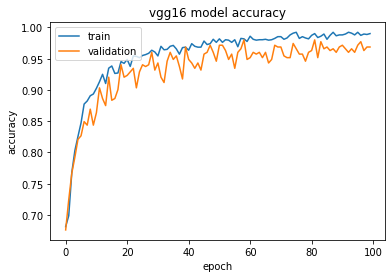

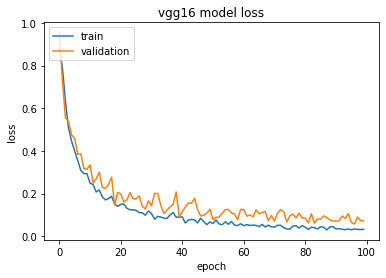

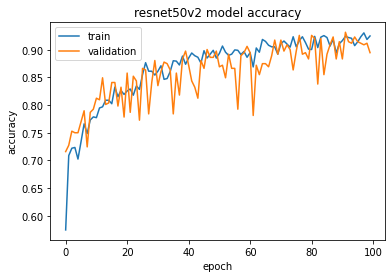

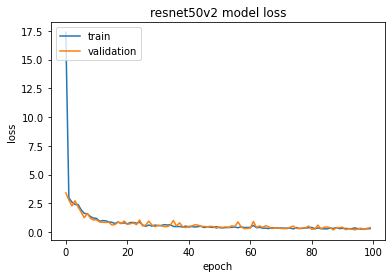

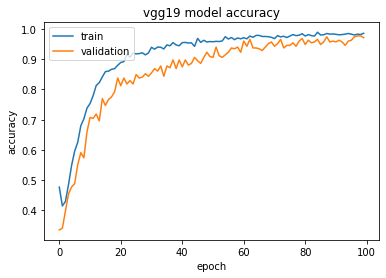

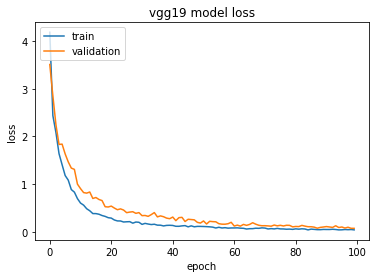

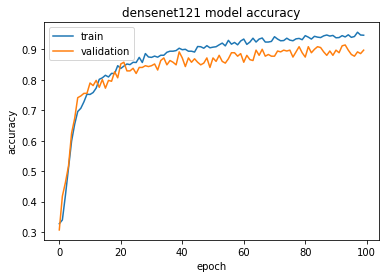

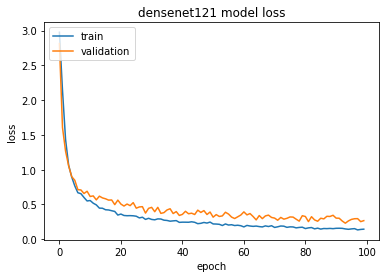

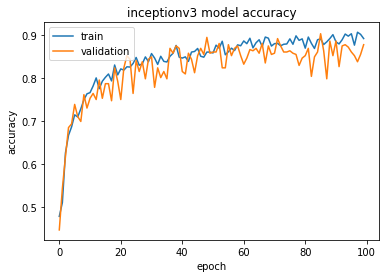

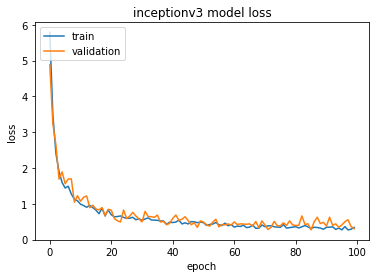

In [ ]:
history_location='/content/drive/MyDrive/COVID_classification/history'
history_names=os.listdir(history_location)
print(history_names)
print(len(history_names))



for name in history_names:

  history_path=history_location+'/'+name
  
  #load history
  with open(history_path, 'rb') as f:
      history = pickle.load(f)

  #  "Accuracy"
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title(name.replace('_history.p','')+' model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  # "Loss"
  #plt.subplot(len(history_names),2,plot_number+1)
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.title(name.replace('_history.p','')+' model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  

# **PNEUMONIA CLASSIFICATION**

## **LOAD IMAGES**

In [ ]:
#copy zip from drive to colab
!cp /content/drive/MyDrive/Pneumonia_classification-20210606T120153Z-001.zip /content

#unzip
!unzip /content/Pneumonia_classification-20210606T120153Z-001.zip

#remove zipfile after unzip to reduce harddisk space
!rm /content/Pneumonia_classification-20210606T120153Z-001.zip

Streaming output truncated to the last 5000 lines.
  inflating: Pneumonia_classification/Data/NORMAL/NORMAL2-IM-0919-0001.jpeg  
  inflating: Pneumonia_classification/Data/PNEUMONIA/person762_virus_1390.jpeg  
  inflating: Pneumonia_classification/Data/PNEUMONIA/person74_bacteria_363.jpeg  
  inflating: Pneumonia_classification/Data/NORMAL/NORMAL2-IM-0944-0001.jpeg  
  inflating: Pneumonia_classification/Data/PNEUMONIA/person721_virus_1340.jpeg  
  inflating: Pneumonia_classification/Data/NORMAL/NORMAL2-IM-0912-0001.jpeg  
  inflating: Pneumonia_classification/Data/NORMAL/NORMAL2-IM-0946-0001.jpeg  
  inflating: Pneumonia_classification/Data/PNEUMONIA/person75_bacteria_365.jpeg  
  inflating: Pneumonia_classification/Data/NORMAL/NORMAL2-IM-0937-0001.jpeg  
  inflating: Pneumonia_classification/Data/NORMAL/NORMAL2-IM-0942-0001.jpeg  
  inflating: Pneumonia_classification/Data/NORMAL/NORMAL2-IM-0957-0001.jpeg  
  inflating: Pneumonia_classification/Data/PNEUMONIA/person645_virus_1226.jpe

## **DATA GENERATOR**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


dir='/content/Pneumonia_classification/Data'
batch_size=32


train_datagen = ImageDataGenerator(
    rotation_range = 30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    dir, # same directory as training data
    target_size=(224,224),
    batch_size=batch_size,
    shuffle=False,
    class_mode='binary',
    subset='validation') # set as validation data

Found 4686 images belonging to 2 classes.
Found 1170 images belonging to 2 classes.


## **EVALUATING METRICES**

In [ ]:
# batch size=32, learning rate=0.001, epoch=50
pneumonia_report={'loss':[],
              'accuracy':[],
              'precision':[],
              'recall':[],
              'f1_score':[]}

model_location='/content/drive/MyDrive/Pneumonia_classification/Models'
model_names=os.listdir(model_location)
print(model_names)
print(len(model_names))


with tf.device('/device:GPU:0'):

  for name in model_names:

    print('evaluating on',name,'model...')
    model_path=model_location+'/'+name

    model=keras.models.load_model(model_path)

    predictions= model.predict(validation_generator, validation_generator.samples // batch_size)

    y_pred = np.argmax(predictions,axis=1)
    y_true = validation_generator.classes

    #compute metrices
    [loss,accuracy]=model.evaluate(validation_generator,verbose=0)
    precision=precision_score(y_true,y_pred)
    recall=recall_score(y_true,y_pred)
    f1=f1_score(y_true,y_pred)

    #add to report
    pneumonia_report['loss'].append(loss)
    pneumonia_report['accuracy'].append(accuracy)
    pneumonia_report['precision'].append(precision)
    pneumonia_report['recall'].append(recall)
    pneumonia_report['f1_score'].append(f1)

  pneumonia_dataframe = pd.DataFrame(pneumonia_report, index = model_names)
  print('\n\n')





['VGG16', 'Resnet50V2', 'VGG19', 'DenseNet121', 'InceptionV3']
5
evaluating on VGG16 model...
evaluating on Resnet50V2 model...
evaluating on VGG19 model...
evaluating on DenseNet121 model...
evaluating on InceptionV3 model...





In [ ]:
# batch size=32, learning rate=0.0001, epoch=100
pneumonia_report={'loss':[],
              'accuracy':[],
              'precision':[],
              'recall':[],
              'f1_score':[]}

model_location='/content/drive/MyDrive/Pneumonia_classification_100epochs/Models'
model_names=os.listdir(model_location)
print(model_names)
print(len(model_names))


with tf.device('/device:GPU:0'):

  for name in model_names:

    print('evaluating on',name,'model...')
    model_path=model_location+'/'+name

    model=keras.models.load_model(model_path)

    predictions= model.predict(validation_generator, validation_generator.samples // batch_size)

    y_pred = np.argmax(predictions,axis=1)
    y_true = validation_generator.classes

    #compute metrices
    [loss,accuracy]=model.evaluate(validation_generator,verbose=0)
    precision=precision_score(y_true,y_pred)
    recall=recall_score(y_true,y_pred)
    f1=f1_score(y_true,y_pred)

    #add to report
    pneumonia_report['loss'].append(loss)
    pneumonia_report['accuracy'].append(accuracy)
    pneumonia_report['precision'].append(precision)
    pneumonia_report['recall'].append(recall)
    pneumonia_report['f1_score'].append(f1)

  pneumonia_dataframe2 = pd.DataFrame(pneumonia_report, index = model_names)
  print('\n\n')
  





['VGG16', 'Resnet50V2', 'DenseNet121', 'VGG19', 'InceptionV3']
5
evaluating on VGG16 model...
evaluating on Resnet50V2 model...
evaluating on DenseNet121 model...
evaluating on VGG19 model...
evaluating on InceptionV3 model...





In [ ]:
print('batch size=32, learning rate=0.001, epoch=50')
pneumonia_dataframe

batch size=32, learning rate=0.001, epoch=50


,loss,accuracy,precision,recall,f1_score
VGG16,0.147635,0.945299,0.977327,0.959016,0.968085
Resnet50V2,1.078044,0.871795,0.995745,0.822014,0.900577
VGG19,0.162498,0.938462,0.955451,0.954333,0.954892
DenseNet121,0.290966,0.893162,0.989218,0.859485,0.919799
InceptionV3,0.776927,0.885470,0.884043,0.973068,0.926421


In [ ]:
print('batch size=32, learning rate=0.0001, epoch=100')
pneumonia_dataframe2

batch size=32, learning rate=0.0001, epoch=100


,loss,accuracy,precision,recall,f1_score
VGG16,0.144859,0.944444,0.959491,0.970726,0.965076
Resnet50V2,0.207803,0.935043,0.958432,0.944965,0.951651
DenseNet121,0.171671,0.923077,0.938426,0.963700,0.950895
VGG19,0.153860,0.933333,0.959064,0.960187,0.959626
InceptionV3,0.211841,0.918803,0.974233,0.929742,0.951468


## **VIEW TRAINING HISTORY**

['vgg16_history.p', 'resnet50v2_history.p', 'vgg19_history.p', 'densenet121_history.p', 'inceptionv3_history.p']
5


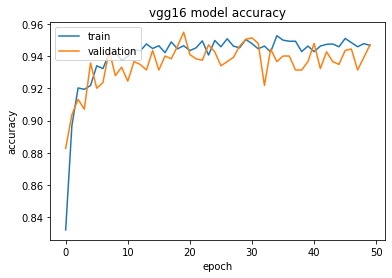

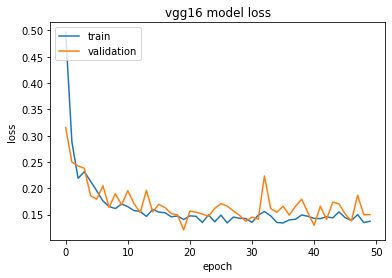

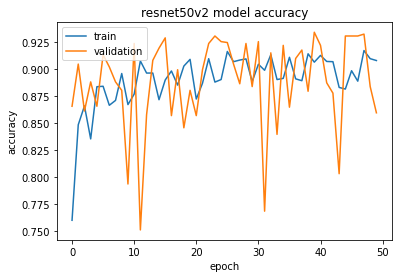

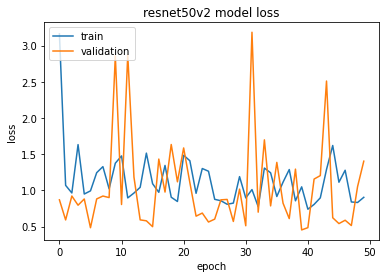

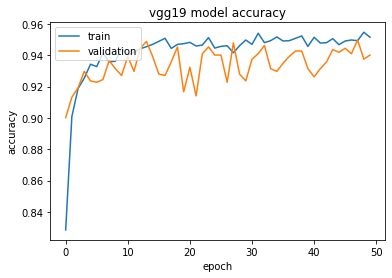

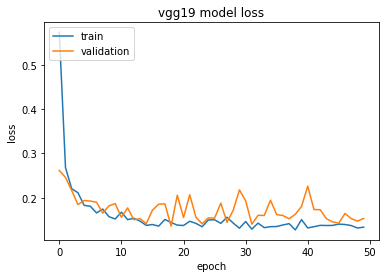

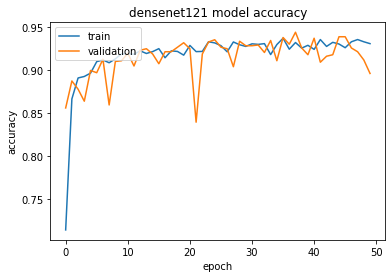

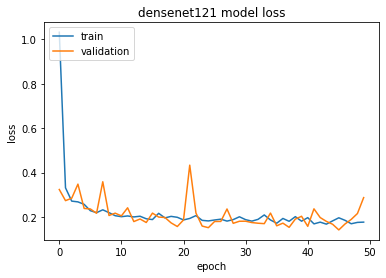

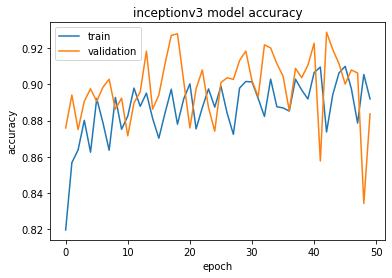

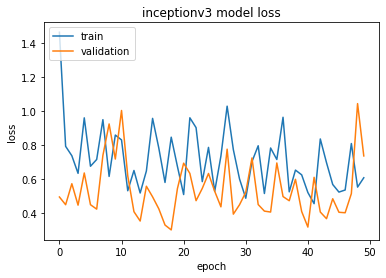

In [ ]:
# batch size=32, learning rate=0.001, epoch=50
history_location='/content/drive/MyDrive/Pneumonia_classification/history'
history_names=os.listdir(history_location)
print(history_names)
print(len(history_names))



for name in history_names:

  history_path=history_location+'/'+name
  
  #load history
  with open(history_path, 'rb') as f:
      history = pickle.load(f)

  #  "Accuracy"
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title(name.replace('_history.p','')+' model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  
  # "Loss"
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.title(name.replace('_history.p','')+' model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  

['vgg16_history.p', 'resnet50v2_history.p', 'densenet121_history.p', 'vgg19_history.p', 'inceptionv3_history.p']
5


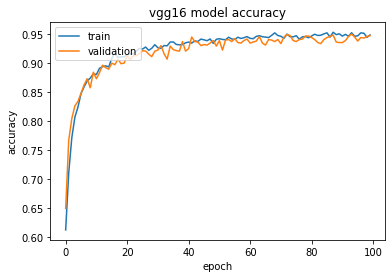

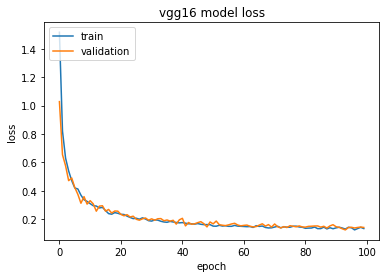

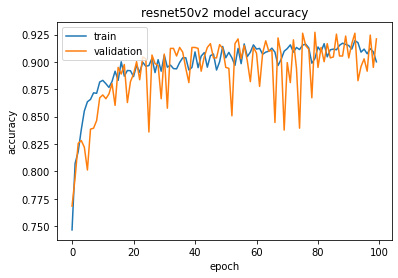

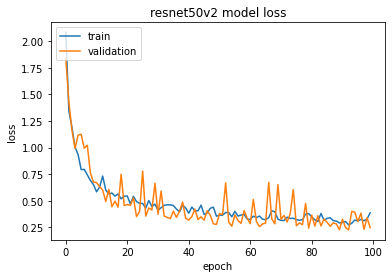

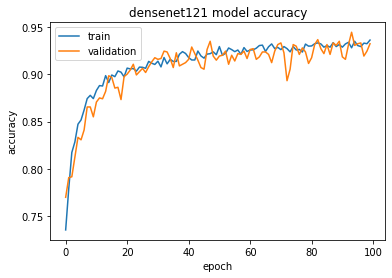

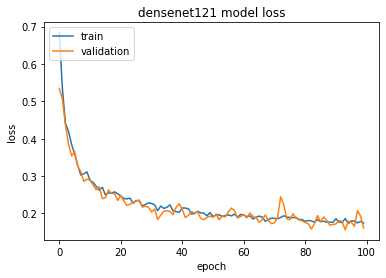

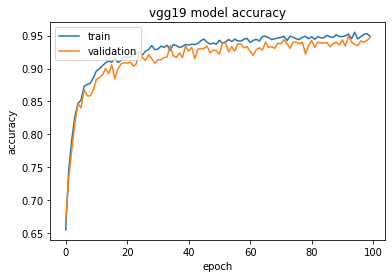

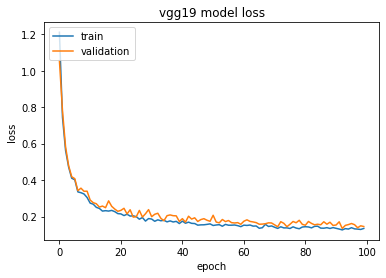

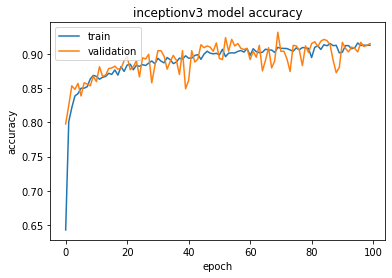

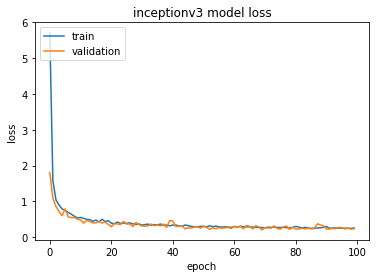

In [ ]:
# batch size=32, learning rate=0.0001, epoch=100
history_location='/content/drive/MyDrive/Pneumonia_classification_100epochs/history'
history_names=os.listdir(history_location)
print(history_names)
print(len(history_names))



for name in history_names:

  history_path=history_location+'/'+name
  
  #load history
  with open(history_path, 'rb') as f:
      history = pickle.load(f)

  #  "Accuracy"
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title(name.replace('_history.p','')+' model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  
  # "Loss"
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.title(name.replace('_history.p','')+' model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  

# **TESTING**

In [ ]:
#make directory for testing
!mkdir test_folder

#upload to test_folder

images given for testing are,
['Non-COVID-19 (7).jpg', 'COVID-19 (376).jpg', 'person3_bacteria_11.jpeg', 'IM-0003-0001.jpeg']
evaluating on VGG16 model to test for Pneumonia...
[1 1 1 0]
evaluating on VGG16 model to test for COVID-19...
[1 0 0 1]


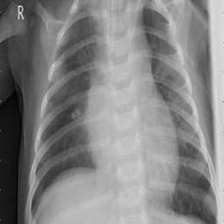

Non-COVID-19 (7).jpg
pneumonia detected
COVID-19 not detected


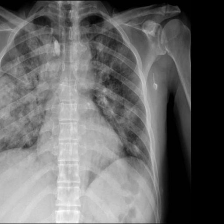

COVID-19 (376).jpg
pneumonia detected
COVID-19 detected


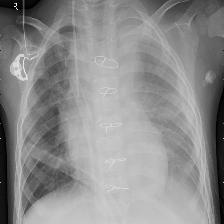

person3_bacteria_11.jpeg
pneumonia detected
COVID-19 detected


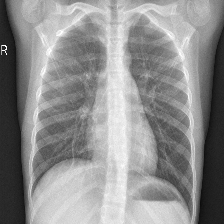

IM-0003-0001.jpeg
pneumonia not detected
COVID-19 not detected


In [ ]:
import numpy as np
import keras
import cv2
import os
from google.colab.patches import cv2_imshow

image_dir='/content/test_folder'
images=os.listdir(image_dir)

if '.ipynb_checkpoints' in images:
  images.remove('.ipynb_checkpoints')

print('images given for testing are,')
print(images)


#load images
x=[]
for image in images:

  raw_image=cv2.imread(image_dir+'/'+image)
  converted_image=cv2.resize(raw_image,(224,224))
  x.append(converted_image)

x=np.array(x)
#print(x.shape)



#pneumonia detection

pneumonia_model_location='/content/drive/MyDrive/Pneumonia_classification_100epochs/Models'

#CHOOSE MODEL TO USE
pneumonia_model_name='VGG16'


print('evaluating on',pneumonia_model_name,'model to test for Pneumonia...')
model_path=pneumonia_model_location+'/'+pneumonia_model_name

model=keras.models.load_model(model_path)

pneumonia_pred= model.predict(x)
pneumonia_pred = np.argmax(pneumonia_pred,axis=1)

print(pneumonia_pred)

#covid-19 detection


covid_model_location='/content/drive/MyDrive/COVID_classification/Models'

#CHOOSE MODEL TO USE
covid_model_name='VGG16'


print('evaluating on',covid_model_name,'model to test for COVID-19...')
model_path=covid_model_location+'/'+covid_model_name

model=keras.models.load_model(model_path)

covid_pred= model.predict(x)
covid_pred = np.argmax(covid_pred,axis=1)

print(covid_pred)


#show results
shape=x.shape
for i in range(shape[0]):

  cv2_imshow(x[i,:,:,:])
  print(images[i])

  #during training, the second folder in dataset was Pneumonia. that is why 1 represents pneumonia positive
  if (pneumonia_pred[i]==1):
    print('pneumonia detected')
  else: 
    print('pneumonia not detected')
  
  #during training, the first folder in dataset was COVID. that is why 0 represents covid positive
  if (covid_pred[i]==0):
    print('COVID-19 detected')
  else :
    print('COVID-19 not detected')






In [ ]:
#remove folder
!rm -rf test_folder